# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Sean StClair

### [Github Link](https://github.com/SMStclair/Sean_final)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [74]:
# Imports
import requests
import os
from bs4 import BeautifulSoup
import html5lib
import pickle
import matplotlib.pyplot as plt
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter
from spacy.tokens import Doc
import nltk
import re
from nltk.sentiment import SentimentIntensityAnalyzer
# Set a specific directory for NLTK data
nltk.data.path.append('C:/Users/jstcl/nltk_data')  # Adjust this to your exact path

# Download punkt and vader_lexicon
nltk.download('punkt', download_dir='C:/Users/jstcl/nltk_data')
nltk.download('vader_lexicon', download_dir='C:/Users/jstcl/nltk_data')

[nltk_data] Downloading package punkt to C:/Users/jstcl/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:/Users/jstcl/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Question 1
1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [75]:
url = "https://bhsregister.com/6270/feature/students-explore-fantasy-worlds-in-new-dungeons-and-dragons-club/"

response = requests.get(url)
if response.status_code == 200:
    html_content = response.text
    print("HTML content fetched successfully.")

    
    file_path = "article_html.pkl"
    with open(file_path, "wb") as file:
        pickle.dump(html_content, file)
        print(f"HTML content saved as {file_path}.")
else:
    print(f"Failed to fetch the article. Status code: {response.status_code}")


HTML content fetched successfully.
HTML content saved as article_html.pkl.


### Question 2
2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [76]:
# Set a specific directory for NLTK data
nltk.data.path.append('C:/Users/jstcl/nltk_data')  # Adjust this to your exact path

# Download necessary resources manually
nltk.download('vader_lexicon', download_dir='C:/Users/jstcl/nltk_data')

# Read the HTML source from the .pkl file
file_path = 'article_html.pkl'
with open(file_path, 'rb') as file:
    html_content = pickle.load(file)

# Parse the HTML and extract the text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Simple sentence tokenization using regex
def simple_sentence_tokenize(text):
    return re.split(r'(?<=[.!?]) +', text)

# Tokenize the text into sentences
sentences = simple_sentence_tokenize(article_text)

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Calculate polarity score
polarity_score = sum(sia.polarity_scores(sentence)["compound"] for sentence in sentences) / len(sentences)

# Print results
print(f"Polarity Score: {polarity_score}")
print(f"Number of Sentences in the Article: {len(sentences)}")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:/Users/jstcl/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Polarity Score: 0.27810769230769233
Number of Sentences in the Article: 26


### Question 3
3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [77]:
nlp = spacy.load("en_core_web_sm")
file_path = 'article_html.pkl'
with open(file_path, 'rb') as file:
    html_content = pickle.load(file)

soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

doc = nlp(article_text)

tokens = [token.text.lower() for token in doc if token.is_alpha and not token.is_stop]
tokens_freq = Counter(tokens)
most_common_tokens = tokens_freq.most_common(5)

print("Top 5 Most Frequent Tokens (with Frequency):")
for token, freq in most_common_tokens:
    print(f"Token: '{token}', Frequency: {freq}")

Top 5 Most Frequent Tokens (with Frequency):
Token: 'register', Frequency: 15
Token: 'search', Frequency: 14
Token: 'dragons', Frequency: 11
Token: 'club', Frequency: 11
Token: 'bhs', Frequency: 11


### Question 4
4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [78]:
nlp = spacy.load("en_core_web_sm")
file_path = 'article_html.pkl'
with open(file_path, 'rb') as file:
    html_content = pickle.load(file)
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()
doc = nlp(article_text)

lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]
lemmas_freq = Counter(lemmas)
most_common_lemmas = lemmas_freq.most_common(5)

print("Top 5 Most Frequent Lemmas (with Frequency):")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: '{lemma}', Frequency: {freq}")


Top 5 Most Frequent Lemmas (with Frequency):
Lemma: 'register', Frequency: 15
Lemma: 'search', Frequency: 14
Lemma: 'dragons', Frequency: 11
Lemma: 'club', Frequency: 11
Lemma: 'bhs', Frequency: 11


### Question  5
5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

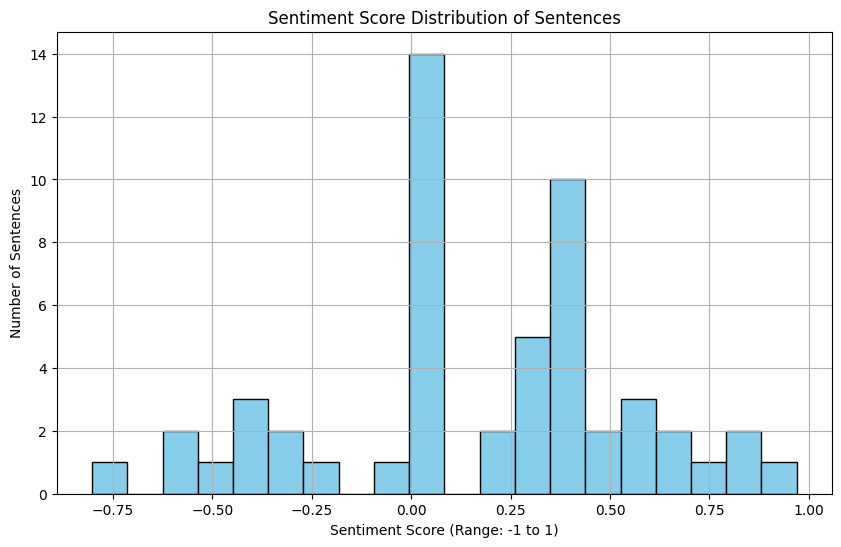

Number of sentences in the article: 53


In [79]:
nlp = spacy.load("en_core_web_sm")
file_path = 'article_html.pkl'
with open(file_path, 'rb') as file:
    html_content = pickle.load(file)

soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()
doc = nlp(article_text)
sentences = list(doc.sents)

sia = SentimentIntensityAnalyzer()
sentiment_scores = []

for sentence in sentences:
    score = sia.polarity_scores(sentence.text)
    sentiment_scores.append(score['compound'])  

plt.figure(figsize=(10, 6))
plt.hist(sentiment_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Score Distribution of Sentences')
plt.xlabel('Sentiment Score (Range: -1 to 1)')
plt.ylabel('Number of Sentences')
plt.grid(True)
plt.show()

print(f"Number of sentences in the article: {len(sentences)}")
# The most common range of sentiment scores appears to be between 0.0 and 0.4, indicating a somewhat positive tone.


### Question  6
6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

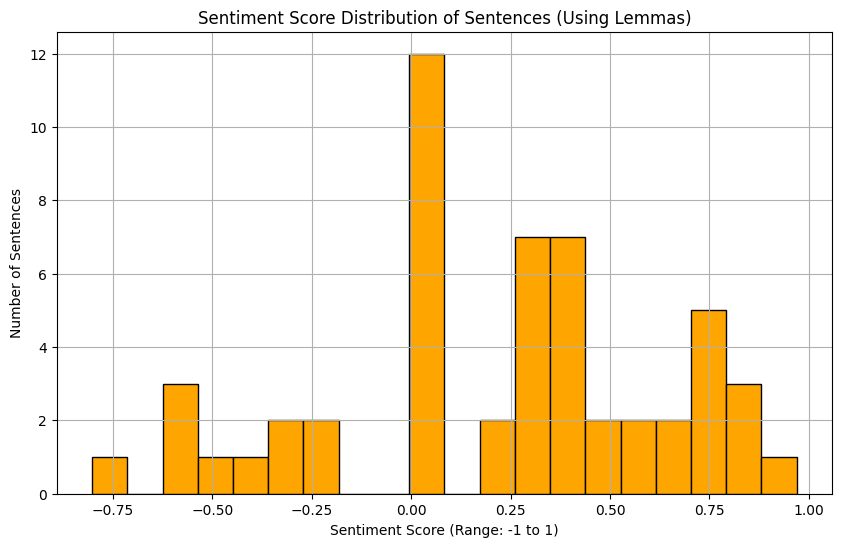

Number of sentences in the article: 53


In [80]:
nlp = spacy.load("en_core_web_sm")
file_path = 'article_html.pkl'
with open(file_path, 'rb') as file:
    html_content = pickle.load(file)

soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()
doc = nlp(article_text)
sentences = list(doc.sents)

sia = SentimentIntensityAnalyzer()
sentiment_scores_lemmas = []

for sentence in sentences:
    lemmas = [token.lemma_ for token in sentence if token.is_alpha and not token.is_stop]
    
    lemma_text = ' '.join(lemmas)
    
    score = sia.polarity_scores(lemma_text)
    sentiment_scores_lemmas.append(score['compound'])

plt.figure(figsize=(10, 6))
plt.hist(sentiment_scores_lemmas, bins=20, color='orange', edgecolor='black')
plt.title('Sentiment Score Distribution of Sentences (Using Lemmas)')
plt.xlabel('Sentiment Score (Range: -1 to 1)')
plt.ylabel('Number of Sentences')
plt.grid(True)
plt.show()

print(f"Number of sentences in the article: {len(sentences)}")
# The most common range of sentiment scores appears to be between 0.00 and 0.75, indicating a very positive tone.


### Question  7
7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.7
* Cutoff Score (lemmas): 0.7

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

### Question  8
8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [81]:
nlp = spacy.load("en_core_web_sm")
file_path = 'article_html.pkl'
with open(file_path, 'rb') as file:
    html_content = pickle.load(file)

soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()
doc = nlp(article_text)
sentences = list(doc.sents)

sia = SentimentIntensityAnalyzer()

cutoff_score = 0.7

sentence_list = []
for sent in sentences:
    tokens = [token.text for token in sent if token.is_alpha and not token.is_stop]
    sentence_text = ' '.join(tokens)
    
    score = sia.polarity_scores(sentence_text)['compound']
    if score > cutoff_score:
        sentence_list.append(sent.text.strip())

summary = ' '.join(sentence_list)

print("Summary of the Article:")
print(summary)
print(f"\nNumber of sentences in the summary: {len(sentence_list)}")

Summary of the Article:
Students explore fantasy worlds in new Dungeons and Dragons Club. – BHS Register









































































Skip to Main Content










Facebook





Instagram





X





Tiktok





YouTube










BHS Register


 





Open Search Bar







Search this site

Submit Search














News
Feature
Sports
Opinion
Reviews
About

Staff
Staff Milestones


Contact Us

How to Join


Support The Register

Become a Friend of Journalism


 

More



















Open Navigation Menu











BHS Register


News
Feature
Sports
Opinion
Reviews
About

Staff
Staff Milestones


Contact Us

How to Join


Support The Register

Become a Friend of Journalism


 

More












BHS Register


 





Open Search Bar







Search this site

Submit Search

















Open Navigation Menu











BHS Register


News
Feature
Sports
Opinion
Reviews
About

Staff
Staff Milestones


Contact Us

How to Join


Support T

### Question 9
9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [82]:
nlp = spacy.load("en_core_web_sm")

file_path = 'article_html.pkl'
with open(file_path, 'rb') as file:
    html_content = pickle.load(file)

soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()
doc = nlp(article_text)

sentences = list(doc.sents)

sia = SentimentIntensityAnalyzer()

cutoff_score = 0.7

sentence_list = []

for sent in sentences:
    tokens = [token.text for token in sent if token.is_alpha and not token.is_stop]
    sentence_text = ' '.join(tokens)
    
    score = sia.polarity_scores(sentence_text)['compound']
    
    if score > cutoff_score:
        sentence_list.append(sent.text.strip())
summary = ' '.join(sentence_list)

print(f"\nNumber of sentences in the summary: {len(sentence_list)}")
summary_score = sia.polarity_scores(summary)['compound']

print(f"\nPolarity Score of the Summary: {summary_score}")



Number of sentences in the summary: 7

Polarity Score of the Summary: 0.9945


### Question  10
10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [83]:
nlp = spacy.load("en_core_web_sm")
file_path = 'article_html.pkl'
with open(file_path, 'rb') as file:
    html_content = pickle.load(file)

soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

doc = nlp(article_text)
sentences = list(doc.sents)

sia = SentimentIntensityAnalyzer()

cutoff_score = 0.7

sentence_list = []

for sent in sentences:
    lemmas = [token.lemma_ for token in sent if token.is_alpha and not token.is_stop]
    sentence_text = ' '.join(lemmas) 
    score = sia.polarity_scores(sentence_text)['compound']
    
    if score > cutoff_score:
        sentence_list.append(sent.text.strip())
summary = ' '.join(sentence_list)

print("Summary of the Article:")
print(summary)
print(f"\nNumber of sentences in the summary: {len(sentence_list)}")


Summary of the Article:
Students explore fantasy worlds in new Dungeons and Dragons Club. – BHS Register









































































Skip to Main Content










Facebook





Instagram





X





Tiktok





YouTube










BHS Register


 





Open Search Bar







Search this site

Submit Search














News
Feature
Sports
Opinion
Reviews
About

Staff
Staff Milestones


Contact Us

How to Join


Support The Register

Become a Friend of Journalism


 

More



















Open Navigation Menu











BHS Register


News
Feature
Sports
Opinion
Reviews
About

Staff
Staff Milestones


Contact Us

How to Join


Support The Register

Become a Friend of Journalism


 

More












BHS Register


 





Open Search Bar







Search this site

Submit Search

















Open Navigation Menu











BHS Register


News
Feature
Sports
Opinion
Reviews
About

Staff
Staff Milestones


Contact Us

How to Join


Support T

### Question 11
11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [84]:
import spacy
from nltk.sentiment import SentimentIntensityAnalyzer
import pickle
from bs4 import BeautifulSoup

nlp = spacy.load("en_core_web_sm")

file_path = 'article_html.pkl'
with open(file_path, 'rb') as file:
    html_content = pickle.load(file)

soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

doc = nlp(article_text)

sentences = list(doc.sents)

sia = SentimentIntensityAnalyzer()

cutoff_score = 0.7

sentence_list = []

for sent in sentences:
    lemmas = [token.lemma_ for token in sent if token.is_alpha and not token.is_stop]
    sentence_text = ' '.join(lemmas)
    
    score = sia.polarity_scores(sentence_text)['compound']
    
    if score > cutoff_score:
        sentence_list.append(sent.text.strip())

summary = ' '.join(sentence_list)

polarity_score = sia.polarity_scores(summary)['compound']

print(f"Polarity Score of the Summary: {polarity_score}")
print(f"Number of sentences in the summary: {len(sentence_list)}")


Polarity Score of the Summary: 0.9954
Number of sentences in the summary: 9


### Question  12
12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

Answer: The polarity scores for the summaries were highly positive at >0.99, whereas the polarity scores of the initial article were mostly neutral to positive at around 0.00 to 0.4. This difference is largely because since most of the comments were neutral or slightly positive, initiating a cutoff to attempt to get between 5-10% of the sentences had to be a high cutoff, leaving mostly positive sentences.

### Question  13
13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

Answer: Overall, I believe the summary scores were more indicative of the original article's message, as while many of the sentences were relatively neutral statements of fact about the game of Dungeons and Dragons or the setup at the school, any actual opinions shared in the article were highly positive.

### Extra analyses 1
14. Count the number of times Dungeons and dragons is referred to by dnd, d&d, and dungeons and dragons.

In [85]:
file_path = 'article_html.pkl'
with open(file_path, 'rb') as file:
    html_content = pickle.load(file)

soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

article_text_lower = article_text.lower()

dnd_count = article_text_lower.count('dnd')
dnd_full_name_count = article_text_lower.count('dungeons and dragons')
d_and_d_count = article_text_lower.count('d&d')

print(f"Number of times 'Dnd' appears: {dnd_count}")
print(f"Number of times 'Dungeons and Dragons' appears: {dnd_full_name_count}")
print(f"Number of times 'D&D' appears: {d_and_d_count}")


Number of times 'Dnd' appears: 0
Number of times 'Dungeons and Dragons' appears: 11
Number of times 'D&D' appears: 2
